In [1]:
# Load the model that we created in Part 2
from gensim.models import Word2Vec

C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\gensim\utils.py:843: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
model = Word2Vec.load("300features_40minwords_10context_full_dataset")

In [14]:
model.most_similar('family')

[('neighbors', 0.6622191667556763),
 ('relatives', 0.6214653253555298),
 ('parents', 0.5821553468704224),
 ('sisters', 0.5591897368431091),
 ('partner', 0.5534984469413757),
 ('families', 0.5507222414016724),
 ('co', 0.5499768257141113),
 ('welty', 0.5451545119285583),
 ('colleagues', 0.5450441241264343),
 ('girlfriend', 0.5401353240013123)]

In [15]:
model.doesnt_match("man woman child dog".split())

'dog'

In [16]:
model.doesnt_match("amazing wonderful great window".split())

'window'

In [17]:
model.doesnt_match("france england germany berlin".split())

'england'

In [10]:
import numpy as np  # Make sure that numpy is imported

def makeFeatureVec(words, model, num_features):
    # Function to average all of the word vectors in a given
    # paragraph
    #
    # Pre-initialize an empty numpy array (for speed)
    featureVec = np.zeros((num_features,),dtype="float32")
    #
    nwords = 0.
    # 
    # Index2word is a list that contains the names of the words in 
    # the model's vocabulary. Convert it to a set, for speed 
    index2word_set = set(model.index2word)
    #
    # Loop over each word in the review and, if it is in the model's
    # vocaublary, add its feature vector to the total
    for word in words:
        if word in index2word_set: 
            nwords = nwords + 1.
            featureVec = np.add(featureVec,model[word])
    # 
    # Divide the result by the number of words to get the average
    featureVec = np.divide(featureVec,nwords)
    return featureVec


def getAvgFeatureVecs(reviews, model, num_features):
    # Given a set of reviews (each one a list of words), calculate 
    # the average feature vector for each one and return a 2D numpy array 
    # 
    # Initialize a counter
    counter = 0.
    # 
    # Preallocate a 2D numpy array, for speed
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    # 
    # Loop through the reviews
    for review in reviews:
        #
        # Print a status message every 1000th review
        if counter%1000. == 0.:
            print("Review %d of %d" % (counter, len(reviews)))
        # 
        # Call the function (defined above) that makes average feature vectors
        reviewFeatureVecs[counter] = makeFeatureVec(review, model, \
           num_features)
        #
        # Increment the counter
        counter = counter + 1.
    return reviewFeatureVecs

## Vector averaging

#### Load datasets

In [11]:
import pandas as pd

# Take one of the books, with approx uniform distribution for its ratings
data = pd.read_csv('Paula_Hawkins-The-Girl-On-The-Train.csv', sep = '\t', header = None)

# Rename columns
data.columns = ['rating', 'tail', 'title', 'review']

In [12]:
# Import various modules for string cleaning
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords

def review_to_wordlist( review, remove_stopwords=False ):
    # Function to convert a document to a sequence of words,
    # optionally removing stop words.  Returns a list of words.
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(review, "html.parser").get_text()
    #  
    # 2. Remove non-letters
    review_text = re.sub("[^a-zA-Z]"," ", review_text)
    #
    # 3. Convert words to lower case and split them
    words = review_text.lower().split()
    #
    # 4. Optionally remove stop words (false by default)
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    #
    # 5. Return a list of words
    return(words)

In [13]:
import time
num_features = 300    # Word vector dimensionality                      
min_word_count = 40   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

In [14]:
start = time.time()

# ****************************************************************
# Calculate average feature vectors for training and testing sets,
# using the functions we defined above. Notice that we now use stop word
# removal.

print("Creating average feature vecs for train reviews")

clean_train_reviews = []
for review in data["review"]:
    clean_train_reviews.append( review_to_wordlist( review, \
        remove_stopwords=True ))

trainDataVecs = getAvgFeatureVecs( clean_train_reviews, model, num_features )

print(time.time() - start)

Creating average feature vecs for train reviews
Review 0 of 37139
Review 1000 of 37139
Review 2000 of 37139
Review 3000 of 37139
Review 4000 of 37139
Review 5000 of 37139
Review 6000 of 37139
Review 7000 of 37139
Review 8000 of 37139
Review 9000 of 37139


C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\ipykernel\__main__.py:24: RuntimeWarning: invalid value encountered in true_divide


Review 10000 of 37139
Review 11000 of 37139
Review 12000 of 37139
Review 13000 of 37139
Review 14000 of 37139
Review 15000 of 37139
Review 16000 of 37139
Review 17000 of 37139
Review 18000 of 37139
Review 19000 of 37139
Review 20000 of 37139
Review 21000 of 37139
Review 22000 of 37139
Review 23000 of 37139
Review 24000 of 37139
Review 25000 of 37139
Review 26000 of 37139
Review 27000 of 37139
Review 28000 of 37139
Review 29000 of 37139
Review 30000 of 37139
Review 31000 of 37139
Review 32000 of 37139
Review 33000 of 37139
Review 34000 of 37139
Review 35000 of 37139
Review 36000 of 37139
Review 37000 of 37139
30.753944158554077


In [15]:
from sklearn.cross_validation import train_test_split

C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
labels = data['rating']

# Split the data into random train and test subsets. Here we use 30% of the data for testing
data_train, data_test, labels_train, labels_test = train_test_split(trainDataVecs, 
                                                                    labels, test_size=0.3, 
                                                                    random_state=42)

In [24]:
labels_train

36492    5.0
17649    5.0
11010    5.0
36707    4.0
6552     4.0
28385    5.0
213      3.0
7726     4.0
32062    4.0
19742    3.0
22846    2.0
15488    3.0
20474    5.0
12607    5.0
23210    2.0
6886     2.0
25577    5.0
14277    1.0
33260    2.0
20680    5.0
20958    5.0
25894    5.0
15375    5.0
4147     5.0
36115    5.0
15325    5.0
33251    5.0
2703     2.0
28809    5.0
28667    1.0
        ... 
30740    2.0
3890     2.0
3556     2.0
11394    4.0
31551    5.0
1267     5.0
1899     3.0
35773    5.0
19118    5.0
189      5.0
2747     3.0
18431    3.0
18942    4.0
25658    2.0
27480    2.0
6396     5.0
28693    4.0
19769    5.0
17568    3.0
5311     5.0
2433     2.0
769      2.0
1685     4.0
16023    5.0
21962    5.0
16850    5.0
6265     1.0
11284    5.0
860      4.0
15795    5.0
Name: rating, dtype: float64

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

start = time.time()

# Initialize the model
clf = RandomForestClassifier(n_estimators = 100)

# Fit the model to the training data
y_score = clf.fit(data_train, labels_train).predict(data_test)
# Perform classific°ation of test data
labels_predicted = clf.predict(data_test)

print(time.time() - start)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [31]:
np.isnan(data_train).sum() / (data_train.shape[0] * data_train.shape[1])

0.0053083048044005078

In [29]:
data_train.shape[0] * data_train.shape[1]

7799100

In [45]:
X = pd.concat((pd.DataFrame(trainDataVecs), data['rating']), axis=1).dropna()

In [50]:
train_data = X.ix[:, :-1]
train_label = X.ix[:, -1]

In [51]:
# Split the data into random train and test subsets. Here we use 30% of the data for testing
data_train, data_test, labels_train, labels_test = train_test_split(train_data, 
                                                                    train_label, test_size=0.3, 
                                                                    random_state=42)

In [52]:
start = time.time()

# Initialize the model
clf = LogisticRegression()

# Fit the model to the training data
y_score = clf.fit(data_train, labels_train).predict(data_test)
# Perform classific°ation of test data
labels_predicted = clf.predict(data_test)

print(time.time() - start)

7.399346828460693


In [53]:
np.sum(labels_predicted == labels_test) / len(labels_test)

0.45737483085250336

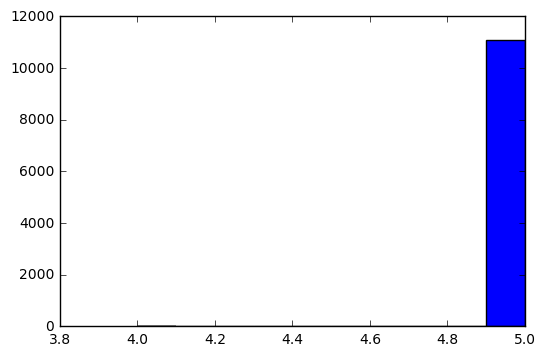

In [54]:
plt.hist(labels_predicted, color = 'b')
plt.show()

In [55]:
start = time.time()

# Initialize the model
clf = RandomForestClassifier(n_estimators=50)

# Fit the model to the training data
y_score = clf.fit(data_train, labels_train).predict(data_test)
# Perform classific°ation of test data
labels_predicted = clf.predict(data_test)

print(time.time() - start)

35.55838060379028


In [56]:
np.sum(labels_predicted == labels_test) / len(labels_test)

0.43085250338294995

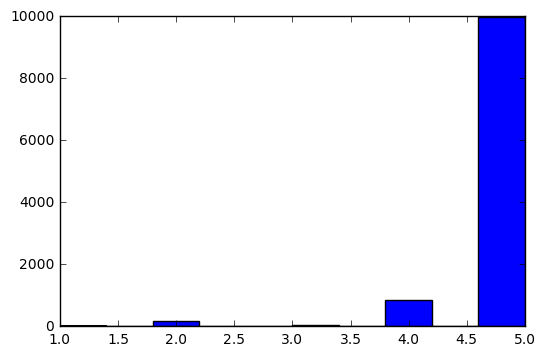

In [57]:
plt.hist(labels_predicted, color = 'b')
plt.show()

#### Let's try with binary sentiments

In [75]:
def sentiment(x):
    
    if x < 5:
        res = 0
    else:
        res = 1
        
    return res

In [76]:
a = list(train_label)
a = [sentiment(x) for x in a]

In [86]:
# Split the data into random train and test subsets. Here we use 30% of the data for testing
data_train, data_test, labels_train, labels_test = train_test_split(train_data, 
                                                                    a, test_size=0.3)

In [87]:
start = time.time()

# Initialize the model
clf = LogisticRegression(C = 100)

# Fit the model to the training data
y_score = clf.fit(data_train, labels_train).predict(data_test)
# Perform classific°ation of test data
labels_predicted = clf.predict(data_test)

print(time.time() - start)

print('The Accuracy on test set is: ', np.sum(labels_predicted == labels_test) / len(labels_test))

9.984652757644653
The Accuracy on test set is:  0.548398737032


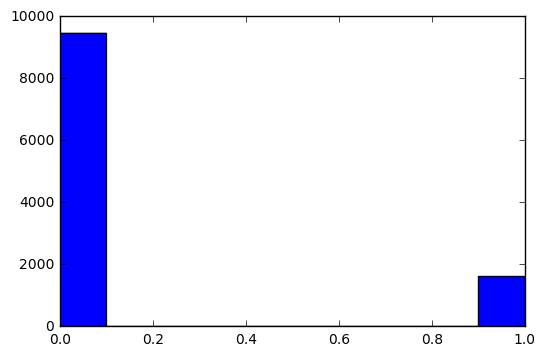

In [88]:
plt.hist(labels_predicted, color = 'b')
plt.show()

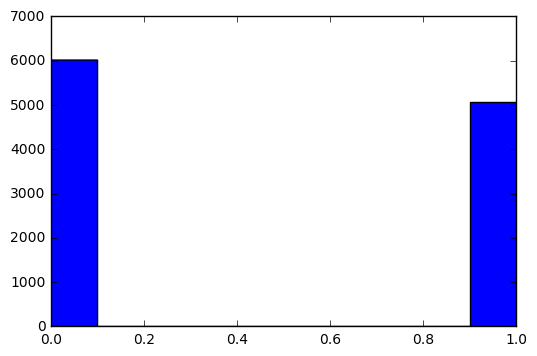

In [81]:
plt.hist(labels_test, color = 'b')
plt.show()

In [91]:
start = time.time()

# Initialize the model
clf = RandomForestClassifier(n_estimators=100)

# Fit the model to the training data
y_score = clf.fit(data_train, labels_train).predict(data_test)
# Perform classific°ation of test data
labels_predicted = clf.predict(data_test)

print(time.time() - start)

print('The Accuracy on test set is: ', np.sum(labels_predicted == labels_test) / len(labels_test))

61.90416932106018
The Accuracy on test set is:  0.537392873252


## Clustering

In [94]:
from sklearn.cluster import KMeans
import time

start = time.time() # Start time

# Set "k" (num_clusters) to be 1/5th of the vocabulary size, or an
# average of 5 words per cluster
word_vectors = model.syn0
num_clusters = int(word_vectors.shape[0] / 5)

# Initalize a k-means object and use it to extract centroids
kmeans_clustering = KMeans( n_clusters = num_clusters )
idx = kmeans_clustering.fit_predict( word_vectors )

# Get the end time and print how long the process took
end = time.time()
elapsed = end - start
print("Time taken for K Means clustering: ", elapsed, "seconds.")

Time taken for K Means clustering:  5.91233229637146 seconds.


In [96]:
# Create a Word / Index dictionary, mapping each vocabulary word to
# a cluster number                                                                                            
word_centroid_map = dict(zip( model.index2word, idx ))

In [111]:
# For the first 10 clusters
for cluster in range(0,30):
    #
    # Print the cluster number  
    print("\nCluster %d" % cluster)
    #
    # Find all of the words for that cluster number, and print them out
    words = []
    for i in range(0,len(word_centroid_map.values())):
        if( list(word_centroid_map.values())[i] == cluster ):
            words.append(list(word_centroid_map.keys())[i])
    print(words)


Cluster 0
['watches', 'watched', 'imagines', 'imagined', 'sees', 'behind', 'upon', 'perfect', 'imagining', 'believes', 'thinks', 'watching']

Cluster 1
['unusual', 'clever', 'creative', 'approach', 'tense', 'descriptive', 'fascinating', 'original', 'unique']

Cluster 2
['normally', 'm', 'am', 'review']

Cluster 3
['lose', 'drag', 'move']

Cluster 4
['self', 'broken', 'emotionally', 'role', 'destructive', 'troubled']

Cluster 5
['over', 'ahead', 'again']

Cluster 6
['kinda', 'overall', 'nonetheless', 'slightly', 'extremely', 'generally', 'somewhat', 'otherwise']

Cluster 7
['past', 'later', 'home', 'room', 'work', 'used', 'old', 'gin', 'house', 'doors']

Cluster 8
['leads', 'led']

Cluster 9
['female', 'narratives', 'st', 'alternating', 'three', 'separate', 'voices', 'among', 'voice', 'narrators']

Cluster 10
['now', 'sorry', 'only', 'saying']

Cluster 11
['gets', 'got', 'was', 'became', 'began', 'fell', 'found', 'went']

Cluster 12
['murderer', 'suspected', 'early', 'villain', 'culpri

#### Bag of centroids

In [112]:
def create_bag_of_centroids( wordlist, word_centroid_map ):
    #
    # The number of clusters is equal to the highest cluster index
    # in the word / centroid map
    num_centroids = max( word_centroid_map.values() ) + 1
    #
    # Pre-allocate the bag of centroids vector (for speed)
    bag_of_centroids = np.zeros( num_centroids, dtype="float32" )
    #
    # Loop over the words in the review. If the word is in the vocabulary,
    # find which cluster it belongs to, and increment that cluster count 
    # by one
    for word in wordlist:
        if word in word_centroid_map:
            index = word_centroid_map[word]
            bag_of_centroids[index] += 1
    #
    # Return the "bag of centroids"
    return bag_of_centroids

In [117]:
# Pre-allocate an array for the training set bags of centroids (for speed)
train_centroids = np.zeros( (data["review"].size, num_clusters), \
    dtype="float32" )

# Transform the training set reviews into bags of centroids
counter = 0
for review in clean_train_reviews:
    train_centroids[counter] = create_bag_of_centroids( review, \
        word_centroid_map )
    counter += 1

In [124]:
np.isnan(train_centroids).sum() # There are no missing values

0

In [128]:
# Split the data into random train and test subsets. Here we use 30% of the data for testing
data_train, data_test, labels_train, labels_test = train_test_split(train_centroids, 
                                                                    data['rating'], test_size=0.3)

start = time.time()

# Initialize the model
clf = LogisticRegression()

# Fit the model to the training data
y_score = clf.fit(data_train, labels_train).predict(data_test)
# Perform classific°ation of test data
labels_predicted = clf.predict(data_test)

print(time.time() - start)

print('The Accuracy on test set is: ', np.sum(labels_predicted == labels_test) / len(labels_test))

1.50099515914917
The Accuracy on test set is:  0.457996768982


In [130]:
# Split the data into random train and test subsets. Here we use 30% of the data for testing
data_train, data_test, labels_train, labels_test = train_test_split(train_centroids, 
                                                                    data['rating'], test_size=0.3)

start = time.time()

# Initialize the model
clf = RandomForestClassifier(n_estimators=100)

# Fit the model to the training data
y_score = clf.fit(data_train, labels_train).predict(data_test)
# Perform classific°ation of test data
labels_predicted = clf.predict(data_test)

print(time.time() - start)

print('The Accuracy on test set is: ', np.sum(labels_predicted == labels_test) / len(labels_test))

22.81406307220459
The Accuracy on test set is:  0.425417339795
